# Kaggle Competition: Spaceship Titanic

## Barudak Bojongsoang Group Members:


1.   Akmal Muzakki Bakir
2.   Muhammad Sya'bani Falif
3.   Muhammad Zaki Rabbani



# Data Wrangling

## Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score

!pip install catboost
!pip install optuna

import optuna
from xgboost import XGBClassifier
import lightgbm as lgb

## Reading The Data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

train_test = pd.concat([train, test], ignore_index=True)

In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## Assesing The Data

### Checkin Train Data

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [ ]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### Checking Test Data

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [ ]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [ ]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [ ]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

## Explanatory Data Analysis (EDA)

### Defining Analysis Questions



1. Bagaimana Proposi Pada Target Variable ? Apakah Kelasnya Seimbang ?
2. Planet Mana Yang Penumpangnya Paling Banyak ?
3. Planet Mana Yang Penumpangnya Paling Banyak Dikeluarkan ?
4. Bagaimana Distribusi Pelanggan Yang Memilih Untuk Mati Suri ?
5. Bagaimana Distribusi Penumpang Yang Dikeluarkan dan Memilih/Tidak Memilih Mati Suri
6. Planet Mana Yang Paling Banyak Dijadikan Tujuan ?
7. Planet Tujuan Mana Yang Paling Banyak Penumpang Keluarnya ?
8. Bagaimana Distribusi Umur Penumpang ?
9. Bagaimana Distribusi Umur Penumpang Yang Sudah Dikeluarkan dan Belum ?
10. Bagaimana Distribusi Penumpang VIP ?
11. Berapa Banyak Penumpang Yang VIP / Bukan VIP Dikeluarkan ?

### 1. Checking Data Proportion

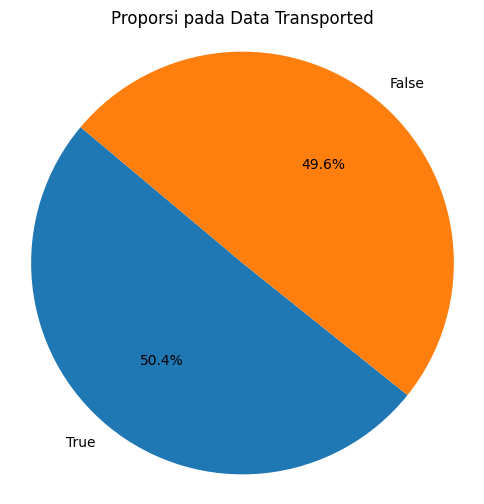

In [ ]:
# Ambil nilai counts dari kolom 'Transported'
transported_counts = train['Transported'].value_counts()

# Buat visualisasi pie chart
plt.figure(figsize=(6, 6))
plt.pie(transported_counts, labels=transported_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Memastikan pie chart terlihat proporsional
plt.title('Proporsi pada Data Transported')
plt.show()

### 2. Which planet has the most passengers?

<ipython-input-97-a3d05d35478a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=passengers_per_planet.index, y=passengers_per_planet.values, palette='coolwarm')


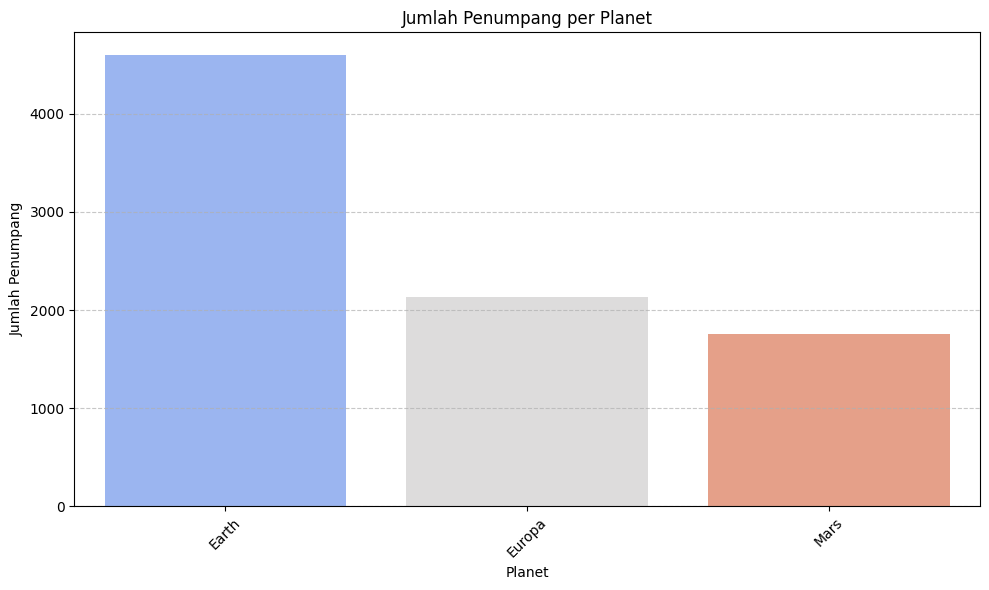

In [ ]:
# Menghitung jumlah penumpang di setiap planet
passengers_per_planet = train['HomePlanet'].value_counts()

# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=passengers_per_planet.index, y=passengers_per_planet.values, palette='coolwarm')
plt.title('Jumlah Penumpang per Planet')
plt.xlabel('Planet')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 3. Which planet has the most passengers expelled?

<ipython-input-98-9ec10a87e32e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=expelled_passengers_per_planet.index, y=expelled_passengers_per_planet.values, palette='Set2')


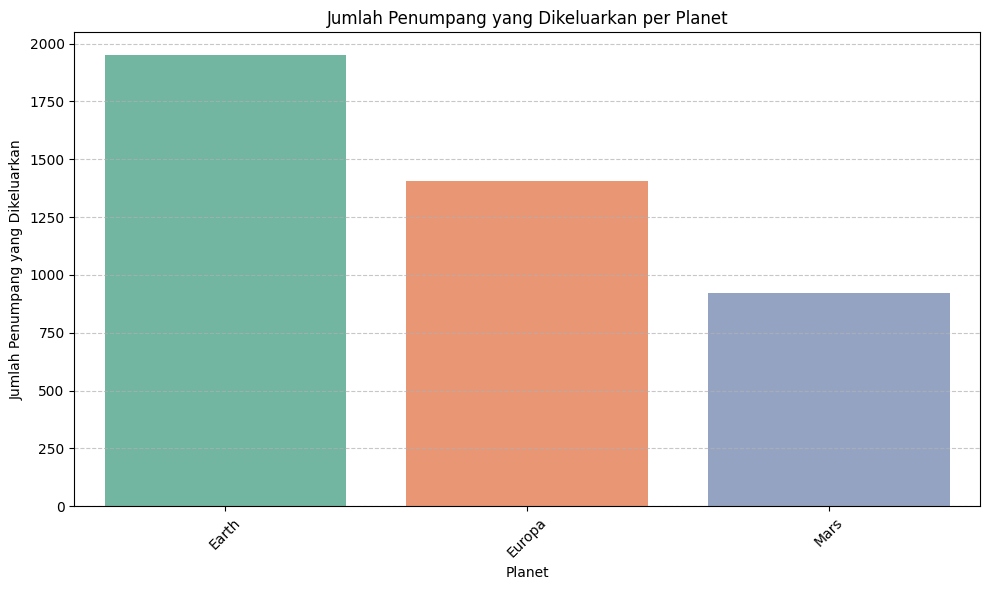

In [ ]:
# Menghitung jumlah penumpang yang dikeluarkan dari setiap planet
expelled_passengers_per_planet = train[train['Transported'] == True]['HomePlanet'].value_counts()

# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=expelled_passengers_per_planet.index, y=expelled_passengers_per_planet.values, palette='Set2')
plt.title('Jumlah Penumpang yang Dikeluarkan per Planet')
plt.xlabel('Planet')
plt.ylabel('Jumlah Penumpang yang Dikeluarkan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. What is the distribution of customers who choose to go into suspended animation?

<ipython-input-99-03608ff2ac1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cryo_sleep_distribution.index, y=cryo_sleep_distribution.values, palette='Set2')


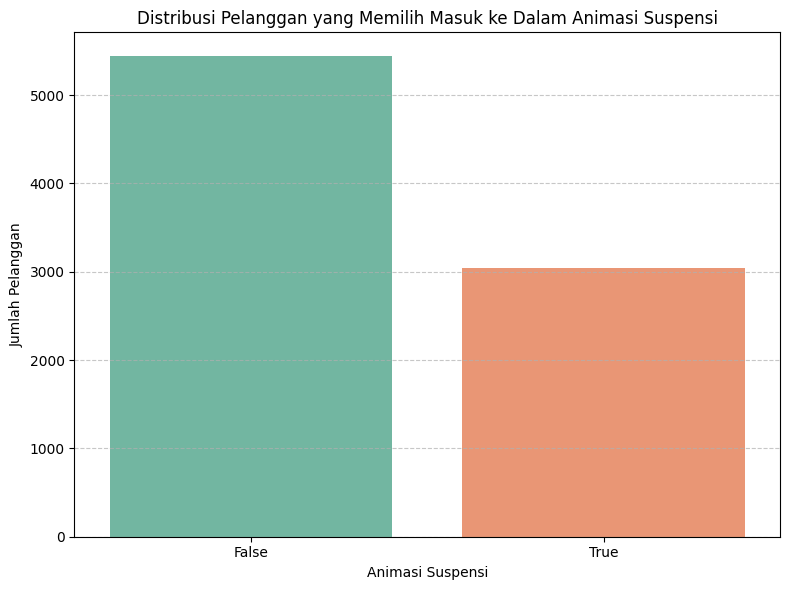

In [ ]:
# Menghitung distribusi pelanggan yang memilih masuk ke dalam animasi suspensi
cryo_sleep_distribution = train['CryoSleep'].value_counts()

# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=cryo_sleep_distribution.index, y=cryo_sleep_distribution.values, palette='Set2')
plt.title('Distribusi Pelanggan yang Memilih Masuk ke Dalam Animasi Suspensi')
plt.xlabel('Animasi Suspensi')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5. What is the distribution of passengers who are expelled and choose/not choose suspended animation

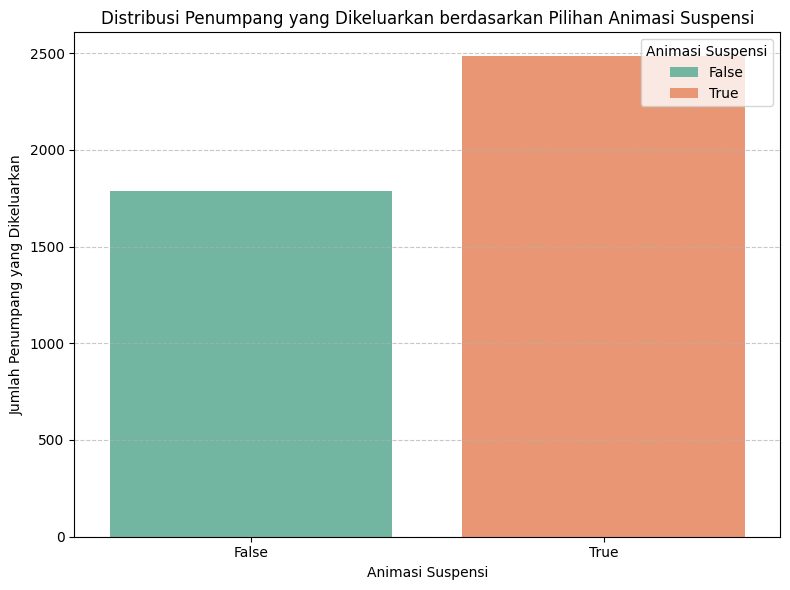

In [ ]:
# Memfilter data untuk hanya mencakup penumpang yang dikeluarkan
expelled_passengers = train[train['Transported'] == True]

# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=expelled_passengers, x='CryoSleep', palette='Set2', hue='CryoSleep')
plt.title('Distribusi Penumpang yang Dikeluarkan berdasarkan Pilihan Animasi Suspensi')
plt.xlabel('Animasi Suspensi')
plt.ylabel('Jumlah Penumpang yang Dikeluarkan')
plt.legend(title='Animasi Suspensi', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6. Which planet is the most popular destination?

<ipython-input-101-60e1fbb5c8a3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=destination_counts.index, y=destination_counts.values, palette='viridis')


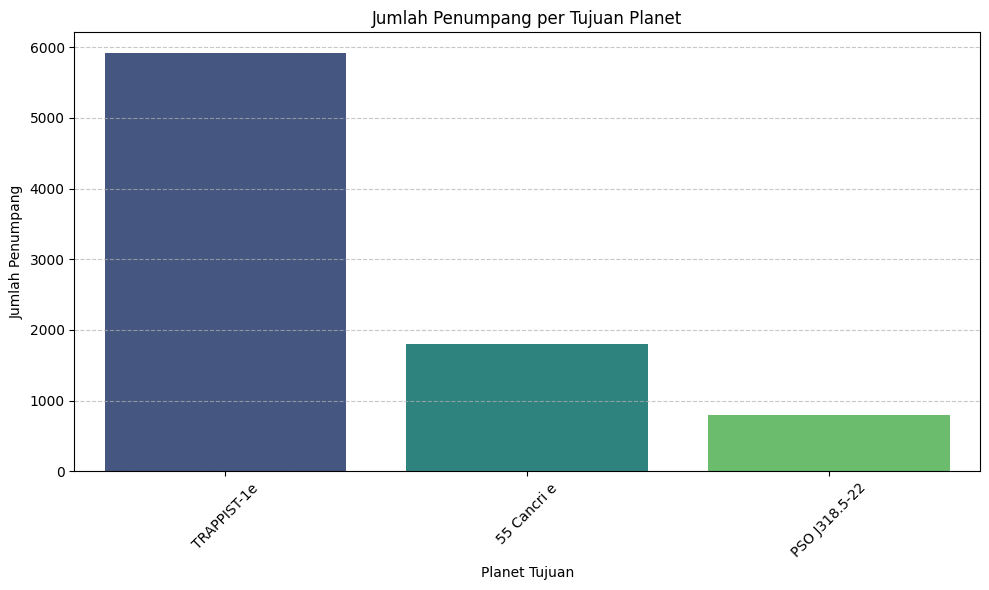

In [ ]:
# Menghitung jumlah penumpang menuju ke setiap planet
destination_counts = train['Destination'].value_counts()

# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=destination_counts.index, y=destination_counts.values, palette='viridis')
plt.title('Jumlah Penumpang per Tujuan Planet')
plt.xlabel('Planet Tujuan')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 7. Which Destination Planet Has the Most Outbound Passengers?

<ipython-input-102-45fdd6fd2a26>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outbound_passengers_per_destination.index, y=outbound_passengers_per_destination.values, palette='rocket')


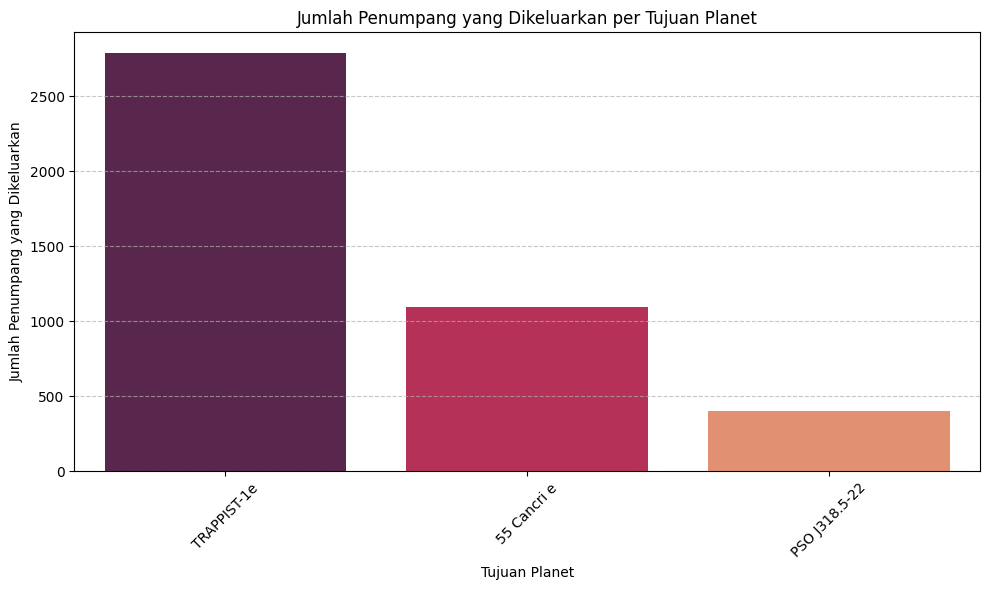

In [ ]:
# Memfilter data untuk hanya mencakup penumpang yang dikeluarkan
outbound_passengers = train[train['Transported'] == True]

# Menghitung jumlah penumpang yang dikeluarkan untuk setiap tujuan planet
outbound_passengers_per_destination = outbound_passengers['Destination'].value_counts()

# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=outbound_passengers_per_destination.index, y=outbound_passengers_per_destination.values, palette='rocket')
plt.title('Jumlah Penumpang yang Dikeluarkan per Tujuan Planet')
plt.xlabel('Tujuan Planet')
plt.ylabel('Jumlah Penumpang yang Dikeluarkan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 8. What is the Age Distribution of Passengers?

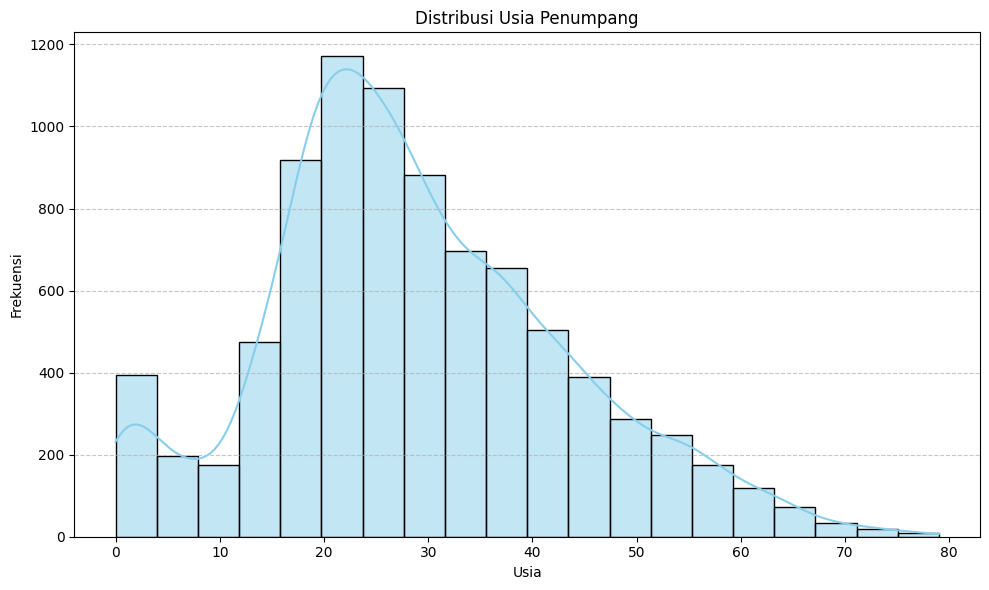

In [ ]:
# Membuat histogram menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribusi Usia Penumpang')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 9. What is the age distribution of customers who have been released or not?

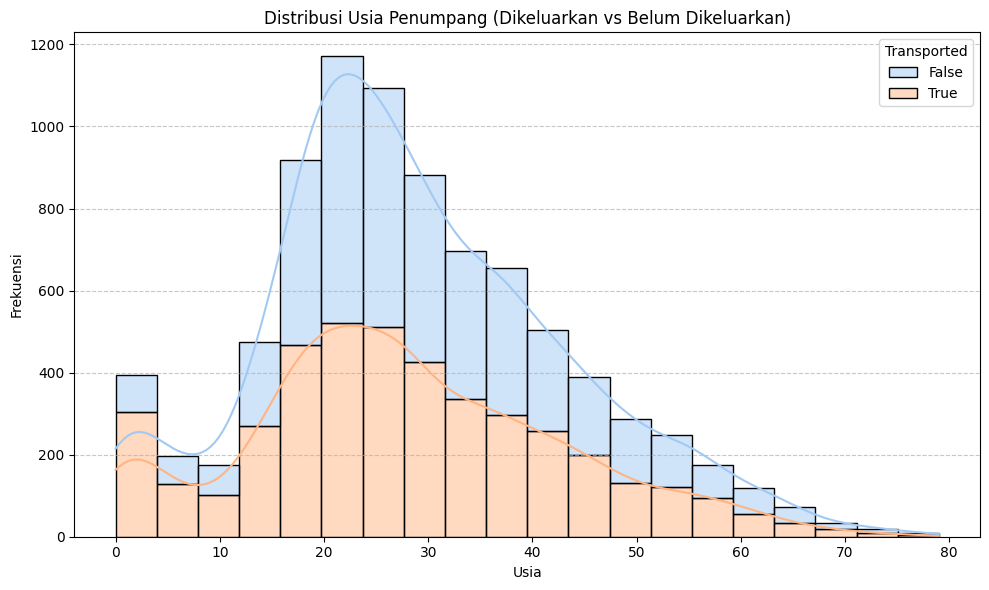

In [ ]:
# Membuat histogram menggunakan seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Age', hue='Transported', bins=20, kde=True, multiple='stack', palette='pastel')
plt.title('Distribusi Usia Penumpang (Dikeluarkan vs Belum Dikeluarkan)')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 10. How is VIP Passenger Distribution?

<ipython-input-105-07b1fe52650b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x='VIP', palette='Set2')


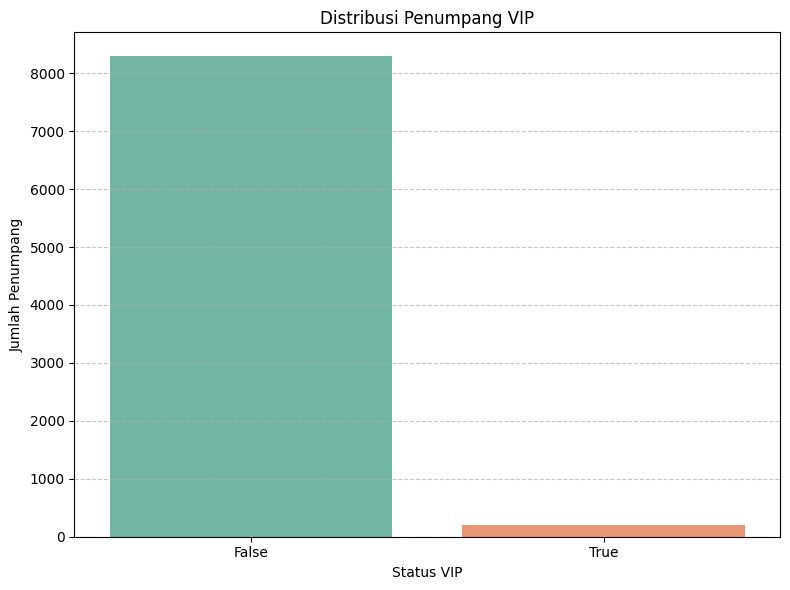

In [ ]:
# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='VIP', palette='Set2')
plt.title('Distribusi Penumpang VIP')
plt.xlabel('Status VIP')
plt.ylabel('Jumlah Penumpang')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 11. How many VIP/non-VIP passengers were excluded?

<ipython-input-106-8cb30590be49>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=excluded_passengers, x='VIP', palette='Set2')


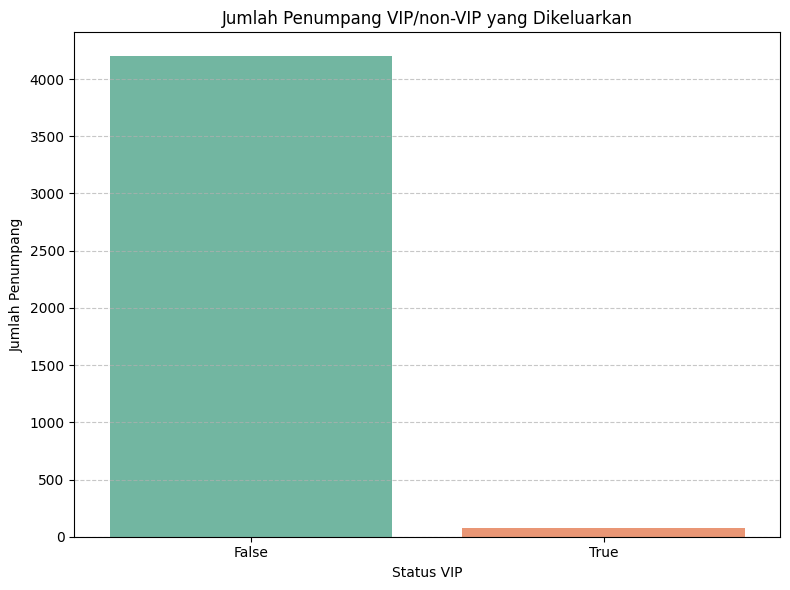

In [ ]:
# Memfilter data untuk hanya mencakup penumpang yang dikeluarkan
excluded_passengers = train[train['Transported'] == True]

# Membuat diagram batang menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.countplot(data=excluded_passengers, x='VIP', palette='Set2')
plt.title('Jumlah Penumpang VIP/non-VIP yang Dikeluarkan')
plt.xlabel('Status VIP')
plt.ylabel('Jumlah Penumpang')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Creating Machine Learning Model

### Feature Engineering

#### Creating Expenses Feature

In [ ]:
Expenses_columns = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train_test['Expenses'] = train_test.loc[:,Expenses_columns].sum(axis=1)

train_test['Expenses']

0            0.0
1          736.0
2        10383.0
3         5176.0
4         1091.0
          ...   
12965        0.0
12966     1018.0
12967        0.0
12968     3203.0
12969        0.0
Name: Expenses, Length: 12970, dtype: float64

#### Set Expenses To Zero If CryoSleep Equals To Zero

In [ ]:
train_test.loc[:,['CryoSleep']]=train_test.apply(lambda x: True if x.Expenses == 0 and pd.isna(x.CryoSleep) else x,axis =1)

train_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expenses
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0


#### Breaking Passenger ID And Cabin Into Group And Cabin Category

In [ ]:
train_test.loc[:,['Group']] = train_test.PassengerId.apply(lambda x: x[0:4] )
train_test[['Deck', 'Number', 'Side']] = train_test['Cabin'].str.split('/', expand=True)

train_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Expenses,Group,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,0001,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,0002,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,0003,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,0003,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,0004,F,1,S


#### Separating Numerical Columns And Categorical Columns

In [ ]:
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','Expenses','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination', ]
transported=['Transported']

In [ ]:
train_test = train_test[num_cols+cat_cols+transported].copy()

### Clean Missing Values

In [ ]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [ ]:
train_test[num_cols] = pd.DataFrame(num_imp.fit_transform(train_test[num_cols]),columns=num_cols)
train_test[cat_cols] = pd.DataFrame(cat_imp.fit_transform(train_test[cat_cols]),columns=cat_cols)

### Encode Categorical Variable

In [ ]:
ohe = OneHotEncoder (handle_unknown='ignore',sparse_output = False, drop='first')
temp_train = pd.DataFrame(ohe.fit_transform(train_test[cat_cols]),columns=ohe.get_feature_names_out())
train_test = train_test.drop(cat_cols,axis=1)
train_test = pd.concat([train_test,temp_train],axis=1)

In [ ]:
train_test.head()

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,Expenses,Age,Transported,CryoSleep_True,Deck_B,...,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,VIP_True,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,False,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25.0,9.0,109.0,549.0,44.0,736.0,24.0,True,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,3576.0,43.0,6715.0,49.0,10383.0,58.0,False,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,371.0,1283.0,0.0,3329.0,193.0,5176.0,33.0,False,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,151.0,70.0,303.0,565.0,2.0,1091.0,16.0,True,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Resetting Train and Test

In [ ]:
train = train_test[train_test['Transported'].notnull()].copy()
train['Transported'] = train.Transported.astype('int')
test = train_test[train_test['Transported'].isnull()].drop("Transported",axis=1)

In [ ]:
X = train.drop('Transported',axis=1)
y = train.Transported

In [ ]:
X

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,Expenses,Age,CryoSleep_True,Deck_B,Deck_C,...,Deck_E,Deck_F,Deck_G,Deck_T,Side_S,VIP_True,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25.0,9.0,109.0,549.0,44.0,736.0,24.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,3576.0,43.0,6715.0,49.0,10383.0,58.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,371.0,1283.0,0.0,3329.0,193.0,5176.0,33.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,151.0,70.0,303.0,565.0,2.0,1091.0,16.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,6819.0,0.0,1643.0,74.0,8536.0,41.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8689,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8690,1872.0,0.0,0.0,1.0,0.0,1873.0,26.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8691,0.0,1049.0,0.0,353.0,3235.0,4637.0,32.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

### Dropping Unimportant Features

In [ ]:
drop_list=['ShoppingMall','Age','CryoSleep_True','HomePlanet_Europa',
'VIP_True','HomePlanet_Mars','Destination_PSO J318.5-22','FoodCourt','Destination_TRAPPIST-1e']

In [ ]:
X = X.drop(drop_list,axis=1)
test = test.drop(drop_list,axis=1)

### Splitting The Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42, stratify = y)

### Calculating Feature Importance

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X, y)

# Get permutation materiality
result = permutation_importance(model, X_val, y_val, scoring="accuracy", n_repeats=100, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = X.columns[sorted_indices[:15]]  # Most 15 importend feature
top_importances = result.importances_mean[sorted_indices[:15]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
Expenses: 0.14145485911443362
Spa: 0.10307073030477286
VRDeck: 0.09527314548591144
RoomService: 0.08451983898792409
Deck_C: 0.0208453133985049
Side_S: 0.01659574468085108
Deck_B: 0.009574468085106393
Deck_E: 0.007119033927544579
Deck_G: 0.002305922944220822
Deck_F: 0.0014893617021276672
Deck_D: 0.000488786658999436
Deck_T: 0.0


In [ ]:
top_features

Index(['Expenses', 'Spa', 'VRDeck', 'RoomService', 'Deck_C', 'Side_S',
       'Deck_B', 'Deck_E', 'Deck_G', 'Deck_F', 'Deck_D', 'Deck_T'],
      dtype='object')

In [ ]:
X = X[top_features]
test = test[top_features]

In [ ]:
def objective(trial):

  params = {
      'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
      'max_depth': trial.suggest_int('max_depth', 3, 10),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
      'subsample': trial.suggest_uniform('subsample', 0.1, 1),
      'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1),
      'alpha': trial.suggest_loguniform('alpha', 2, 5),
      'lambda': trial.suggest_loguniform('lambda', 2, 5),
      'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
      'num_parallel_tree': trial.suggest_int('num_parallel_tree', 1, 2)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = XGBClassifier(**params, random_state=0)

  #evaluate model using cross-validation
  score = cross_val_score(model, X, y, cv=5).mean()

  return score

#run hyperparameter optimization with optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-03-31 05:14:29,617] A new study created in memory with name: no-name-0f57c9af-c542-4290-bac0-806ebe4a1c43
<ipython-input-128-eaab8ec42d24>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 1),
<ipython-input-128-eaab8ec42d24>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.1, 1),
<ipython-input-128-eaab8ec42d24>:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,

In [ ]:
best_params = study.best_params
print(f'Best hyperparameters: {best_params}')

Best hyperparameters: {'n_estimators': 919, 'max_depth': 5, 'learning_rate': 0.2332677780496819, 'subsample': 0.5833766560167063, 'colsample_bytree': 0.5663070529868229, 'alpha': 4.399680522911158, 'lambda': 2.393921210031002, 'min_child_weight': 1, 'num_parallel_tree': 1}


In [ ]:
#create XGBClassifier model with best hyperparameters
model = XGBClassifier(**best_params, random_state=0)

In [ ]:
#fit and predict using model
model.fit(X, y)
predictions = model.predict(test)

In [ ]:
sample['Transported'] = predictions
sample['Transported']=sample['Transported']>0.5
sample.to_csv('final_3.csv', index=False)

### Best XGBoost Parameter

In [ ]:
# params_xgb_best= {'lambda': 3.0610042624477543,
#              'alpha': 4.581902571574289,
#              'colsample_bytree': 0.9241969052729379,
#              'subsample': 0.9527591724824661,
#              'learning_rate': 0.06672065863100594,
#              'n_estimators': 730,
#              'max_depth': 5,
#              'min_child_weight': 1,
#              'num_parallel_tree': 1}


In [ ]:
# X,y = shuffle(X,y, random_state=42)
# X = X.reset_index(drop=True)
# y = y.reset_index(drop=True)

In [ ]:
# pred_xgb_best = (xgb.XGBClassifier(**params_xgb_best).fit(X,y)).predict(test)
# sample['Transported'] = pred_xgb_best

# #This converts the numbers to True/False values
# sample['Transported']=sample['Transported']>0.5
# sample.to_csv('best_submit.csv', index=False)